# Assignment 2

## Problem 1: Gillespie's Direct Algorithm

In [125]:
from IPython.display import Image
import scipy
from scipy import fftpack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pp
from scipy import integrate, optimize
from scipy.integrate import odeint
from random import random
import math
from scipy.interpolate import interp1d


## Defining the functions for the first problem

In [144]:
def Gillespie_direct_algorithm(beta, gamma, mu, psi, N, X, Y, Z, time):
    
    '''
        Defining the different rates

        recovery rate = gamma * Y
        infection rate = beta * X * Y / N
        birth rate = mu * N
        death rates = mu * (X,Y,Z)
        import rates = rho * sqrt(N) 
    '''
    

    '''
        Initialising the time and the vectors containign the numbers
        of infected/subsceptible and recovered individuals  
    '''
    t = 0
    inf = []
    sub = []
    rec = []
    T = []

    # cycle
    while t < time:

        # total rate is the sum of all the rates
        rates = [gamma * Y, beta * X * Y / N, mu * N, mu * Y, mu * Z, mu * X, psi * math.sqrt(N)]
        total_rate = sum(rates)

        # time-step 
        dt = - math.log(random()) / total_rate
        t += dt
        
        # what's the next event?
        P = random() * total_rate

        if P < rates[0]: # recovered
            Z += 1
            Y -= 1 
            X = X
        elif P < sum(rates[:2]): # infected
            Y += 1
            X -= 1
            Z = Z
        elif P < sum(rates[:3]): # birth
            Y = Y
            X += 1
            Z = Z
        elif P < sum(rates[:4]): # death of a infective
            Y -= 1
            X = X
            Z = Z
        elif P < sum(rates[:5]): # death of a recovered
            Y = Y
            X = X
            Z -= 1
        elif P < sum(rates[:6]): # death of subsceptible
            Y = Y
            X -= 1
            Z = Z
        elif P < sum(rates[:7]): # imports
            Z = Z
            X = X - 1
            Y = Y + 1



        inf.append(Y)
        rec.append(Z)
        sub.append(X)
        T.append(t)
        
    return inf, rec, sub, T


# Defining the SIR model
# Density-dependent transmission 

def sir_model_continous(y, x, beta, gamma, mu, psi):
    S = mu*(y[0]+y[1]+y[2]) - beta * y[0]* y[1]/(y[0]+y[1]+y[2]) - mu * y[0] - psi * (y[0]+y[1]+y[2])**0.5
    I = beta * y[0] * y[1]/(y[0]+y[1]+y[2]) - (gamma + mu)*y[1] + psi * (y[0]+y[1]+y[2])**0.5
    R = gamma * y[1] - mu * y[2]
    return S, I, R


In [174]:
def Plotter(n_simulation,beta,gamma,mu,psi,X,Y,Z,t,scale=False):
    N = X + Y + Z
    y_sim = []
    t_range = np.linspace(0,t, 2000)
    extinction_counter = 0
    for i in range(0,n_simulation):
        inf, rec, sub, T = Gillespie_direct_algorithm(beta, gamma, mu, psi, N, X, Y, Z, t)
        
        f = interp1d(T, inf,fill_value="extrapolate")
        y_values = f(t_range)
        y_sim.append(y_values)
        
    means = []
    stds = []
    for i in range(0,len(y_sim[0])):
        column = [row[i] for row in y_sim]
        means.append(np.mean(column, axis = 0))
        stds.append(np.std(column, axis = 0))
    
    
    
    sol = odeint(sir_model_continous,[X,Y,Z], t_range, (beta, gamma, mu,psi))
    S = sol[:, 0]
    I = sol[:, 1]
    R = sol[:, 2]
    
    plt.plot(t_range, means, color = "red", alpha = 0.9)
    plt.fill_between(t_range,np.subtract(means,stds),np.add(means,stds),alpha=0.2)
    plt.plot(t_range, I, color = "black",linestyle = "dashed")
    plt.grid()
    plt.legend()
    plt.xlabel("t (years)")
    if scale:
        plt.yscale("log")
    plt.show()
    
    


## increased transient

No handles with labels found to put in legend.


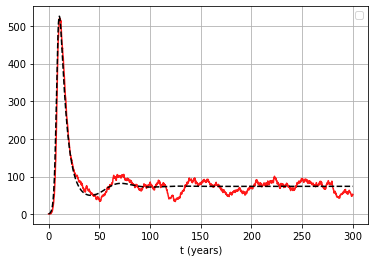

In [166]:
# Defining the parameters 
# Parameter values and initial conditions:
beta = 1
gamma = 1/6
mu = 1/60
psi = 5.5e-4
nu = 1/60
rho = 0
N = 1000
X = 999
Y = 1
Z = 0


Plotter(1,1,1/6,1/60,5.5e-4,999,1,0,300)



## stochastic resonance

No handles with labels found to put in legend.


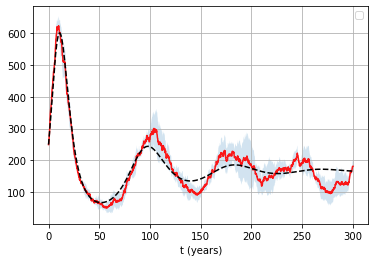

In [171]:
# Defining the parameters of the system (we are now using a yearly time-scale)

beta = 0.8
gamma = 0.4
mu = 1/70
psi = 5e-3

Plotter(3,0.8,0.4,1/70,5.5e-3,7000,250,2750,300)

## Extinction

No handles with labels found to put in legend.


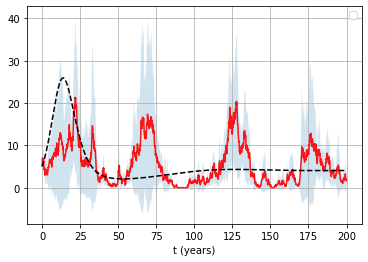

In [173]:
Plotter(3,1,0.8,1/70,6e-3,995,5,0,200)

## variance

In [244]:
def variance(n_simulations, beta, gamma, mu, psi, t):
    y_sim = []
    t_range = np.linspace(0,t, 100)
    for n in [1000,100000,30000]:
        infected = []
        for i in range(0,n_simulations):
            X = n * (1-10**-3)
            Y = n * (10**-3)
            Z = 0
            inf, rec, sub, T = Gillespie_direct_algorithm(beta, gamma, mu, psi, n, X, Y, Z, t)
            num_inf = sum(inf)
            infected.append(num_inf)
        y_sim.append(infected)
        means = []
        stds = []
    for i in range(0,len(y_sim)):
        column = [row[i] for row in y_sim]
        means.append(np.mean(column, axis = 0))
        stds.append(np.std(column, axis = 0)**2)
        plt.plot(means[i],stds[i],"r+")
    plt.plot(means,[i*100 for i in means])
    plt.xscale("log")
    plt.yscale("log")
    plt.show()
    

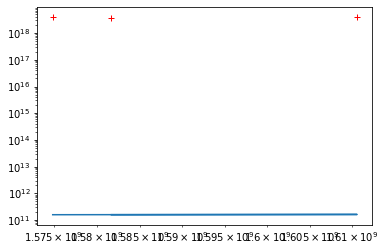

In [245]:
variance(3, 1, 1/10,5.5e-5, 5e-3,10)